# 問題1 公式チュートリアルモデルを分担して実行

MaskingNoiseAutoencoderRunner.ipynbを参照

In [1]:
import tensorflow as tf

# 問題3 Iris(2値分類)をKerasで学習

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# データセットの読み込み
dataset_path ="../Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [8]:
#Sequentialモデルの使用
from keras import backend as K 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu,
                               input_shape=(4, )))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()



Using TensorFlow backend.
W1209 11:54:06.991743 4799473088 deprecation.py:506] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
            metrics=['accuracy'])

W1209 11:56:34.229336 4799473088 deprecation.py:323] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
history = model.fit(X_train, y_train, batch_size=4, epochs=100,
                   validation_data = (X_val, y_val))


Train on 64 samples, validate on 16 samples
Epoch 1/100
64/64 [==============================] - 0s 3ms/sample - loss: 0.8250 - acc: 0.5000 - val_loss: 0.6324 - val_acc: 0.6250
Epoch 2/100
64/64 [==============================] - 0s 650us/sample - loss: 0.6050 - acc: 0.6719 - val_loss: 0.6658 - val_acc: 0.3750
Epoch 3/100
64/64 [==============================] - 0s 670us/sample - loss: 0.5220 - acc: 0.7969 - val_loss: 0.4259 - val_acc: 0.8750
Epoch 4/100
64/64 [==============================] - 0s 712us/sample - loss: 0.4330 - acc: 0.8281 - val_loss: 0.4796 - val_acc: 0.6875
Epoch 5/100
64/64 [==============================] - 0s 535us/sample - loss: 0.3813 - acc: 0.7969 - val_loss: 0.3377 - val_acc: 0.8125
Epoch 6/100
64/64 [==============================] - 0s 654us/sample - loss: 0.2604 - acc: 0.9062 - val_loss: 0.1457 - val_acc: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 533us/sample - loss: 0.1915 - acc: 0.9375 - val_loss: 0.1080 - val_acc: 1.0000
Epoch 8/100
6

In [16]:
score = model.evaluate(X_train, y_train, verbose=0)
print('train loss: ', score[0])
print('train acc: ', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: ', score[0])
print('test acc: ', score[1])

train loss:  0.23741699755191803
train acc:  0.9375
test loss:  0.6763339042663574
test acc:  0.8


# 問題4 Iris(多値分類)をKerasで学習

In [23]:
from sklearn.preprocessing import OneHotEncoder
# データセットの読み込み
dataset_path ="../Sprint13/Iris.csv"
df = pd.read_csv(dataset_path)
# データフレームから条件抽出
#df = df[(df["Species"] == "Iris-versicolor")|(df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
# ラベルを数値に変換
y[y=='Iris-versicolor'] = 0
y[y=='Iris-virginica'] = 1
y[y=='Iris-setosa'] = 2
ohe = OneHotEncoder(sparse=False)
y_onehot = ohe.fit_transform(y.reshape(-1,1))

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [25]:
print(y_train.shape)
print(np.unique(y_train))

(96, 3)
[0. 1.]


In [20]:
#functional APIを使用する

K.clear_session()
input_data = tf.keras.layers.Input(shape=(4, ))
x = tf.keras.layers.Dense(50, activation=tf.nn.relu)(input_data)
x = tf.keras.layers.Dense(100, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=input_data, outputs=output)
model.summary()


W1209 12:11:12.270226 4799473088 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1209 12:11:12.271608 4799473088 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1209 12:11:12.276983 4799473088 deprecation_wrapper.py:119] From //anaconda3/envs/aistudio/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 5,653
Trainable params: 5,653
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.train.AdamOptimizer(learning_rate=0.01),
             metrics=['accuracy'])
history = model.fit(X_train, y_train, verbose=1, batch_size=4,
                   epochs=100, validation_data = (X_val, y_val))

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 0s 2ms/sample - loss: 0.6361 - acc: 0.7396 - val_loss: 0.4299 - val_acc: 0.7083
Epoch 2/100
96/96 [==============================] - 0s 499us/sample - loss: 0.3372 - acc: 0.8854 - val_loss: 0.2267 - val_acc: 0.9167
Epoch 3/100
96/96 [==============================] - 0s 601us/sample - loss: 0.3147 - acc: 0.8333 - val_loss: 0.6956 - val_acc: 0.7083
Epoch 4/100
96/96 [==============================] - 0s 546us/sample - loss: 0.2231 - acc: 0.9375 - val_loss: 0.2451 - val_acc: 0.9167
Epoch 5/100
96/96 [==============================] - 0s 549us/sample - loss: 0.1212 - acc: 0.9479 - val_loss: 0.2985 - val_acc: 0.9167
Epoch 6/100
96/96 [==============================] - 0s 428us/sample - loss: 0.4728 - acc: 0.8854 - val_loss: 0.5476 - val_acc: 0.7083
Epoch 7/100
96/96 [==============================] - 0s 527us/sample - loss: 0.1980 - acc: 0.9375 - val_loss: 0.2577 - val_acc: 0.8750
Epoch 8/100
9

Epoch 61/100
96/96 [==============================] - 0s 513us/sample - loss: 0.0408 - acc: 0.9792 - val_loss: 0.2028 - val_acc: 0.8750
Epoch 62/100
96/96 [==============================] - 0s 449us/sample - loss: 0.0406 - acc: 1.0000 - val_loss: 0.3054 - val_acc: 0.9167
Epoch 63/100
96/96 [==============================] - 0s 449us/sample - loss: 0.0307 - acc: 0.9896 - val_loss: 0.1960 - val_acc: 0.9167
Epoch 64/100
96/96 [==============================] - 0s 412us/sample - loss: 0.0371 - acc: 0.9896 - val_loss: 0.3970 - val_acc: 0.9167
Epoch 65/100
96/96 [==============================] - 0s 369us/sample - loss: 0.0727 - acc: 0.9792 - val_loss: 0.2300 - val_acc: 0.9167
Epoch 66/100
96/96 [==============================] - 0s 359us/sample - loss: 0.0514 - acc: 0.9792 - val_loss: 0.4047 - val_acc: 0.9167
Epoch 67/100
96/96 [==============================] - 0s 372us/sample - loss: 0.1935 - acc: 0.8854 - val_loss: 0.2621 - val_acc: 0.9167
Epoch 68/100
96/96 [============================

In [31]:
score = model.evaluate(X_train, y_train, verbose=0)
print('train loss: ', score[0])
print('train acc: ', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('test loss: ', score[0])
print('test acc: ', score[1])

train loss:  0.10026301257312298
train acc:  0.9583333
test loss:  0.06912560760974884
test acc:  0.96666664


# 問題5 House PriceをKerasで学習

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df_house = pd.read_csv('../train.csv')

In [35]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
X = np.array(df_house.loc[:,['GrLivArea', 'YearBuilt']])
y = np.array(df_house.loc[:, 'SalePrice']).reshape(-1,1)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0,
                                                  test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                 random_state=0, test_size=0.2)
sr = StandardScaler()
X_train_std = sr.fit_transform(X_train)
X_test_std = sr.transform(X_test)
X_val_std = sr.transform(X_val)


In [73]:
#Model subclassingの書き方

class RegModel(tf.keras.Model):
    
    def __init__(self):
        #keras.Modelを継承して、initを呼び出している
        super(RegModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50,
                                            activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(100, 
                                               activation=tf.nn.relu)
        self.dense3 = tf.keras.layers.Dense(1)
            
        
    def call(self, inputs):
        x = tf.cast(inputs, tf.float64)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)
    
            
        

In [74]:
model = RegModel()


In [75]:
X_train_std = X_train_std.astype(np.float64)
X_test_std = X_test_std.astype(np.float64)
X_val_std = X_val_std.astype(np.float64)

y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)
y_val = y_val.astype(np.float64)

In [79]:
model.compile(loss='mean_squared_error',
              optimizer = tf.train.AdamOptimizer(learning_rate = 0.01),
             metrics=['mse'])


In [85]:
history = model.fit(X_train_std, y_train, batch_size=4, epochs=100,
                   verbose=1, validation_data=(X_val_std, y_val))

Train on 934 samples, validate on 234 samples
Epoch 1/100
934/934 [==============================] - 0s 381us/step - loss: 14372513755.3747 - mean_squared_error: 14372513755.3747 - val_loss: 1575644055.2479 - val_mean_squared_error: 1575644055.2479
Epoch 2/100
934/934 [==============================] - 0s 282us/step - loss: 2120273576.8051 - mean_squared_error: 2120273576.8051 - val_loss: 1529375152.5470 - val_mean_squared_error: 1529375152.5470
Epoch 3/100
934/934 [==============================] - 0s 318us/step - loss: 2129129061.2934 - mean_squared_error: 2129129061.2934 - val_loss: 1530335000.2051 - val_mean_squared_error: 1530335000.2051
Epoch 4/100
934/934 [==============================] - 0s 293us/step - loss: 2103588869.4133 - mean_squared_error: 2103588869.4133 - val_loss: 1502913670.1538 - val_mean_squared_error: 1502913670.1538
Epoch 5/100
934/934 [==============================] - 0s 306us/step - loss: 2091524361.9358 - mean_squared_error: 2091524361.9358 - val_loss: 15046

Epoch 82/100
934/934 [==============================] - 0s 233us/step - loss: 1945442464.2570 - mean_squared_error: 1945442464.2570 - val_loss: 1388513396.4444 - val_mean_squared_error: 1388513396.4444
Epoch 83/100
934/934 [==============================] - 0s 339us/step - loss: 1934744718.5096 - mean_squared_error: 1934744718.5096 - val_loss: 1452592883.6239 - val_mean_squared_error: 1452592883.6239
Epoch 84/100
934/934 [==============================] - 0s 384us/step - loss: 1926367935.2034 - mean_squared_error: 1926367935.2034 - val_loss: 1390765213.3333 - val_mean_squared_error: 1390765213.3333
Epoch 85/100
934/934 [==============================] - 0s 325us/step - loss: 1926199064.3597 - mean_squared_error: 1926199064.3597 - val_loss: 1447783708.1026 - val_mean_squared_error: 1447783708.1026
Epoch 86/100
934/934 [==============================] - 0s 350us/step - loss: 1924989172.0771 - mean_squared_error: 1924989172.0771 - val_loss: 1458088693.8803 - val_mean_squared_error: 145808

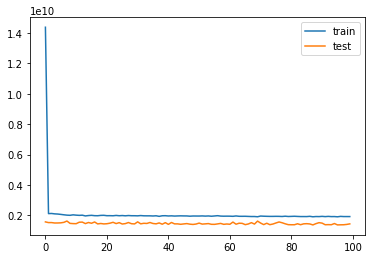

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['mean_squared_error'],label='train')
plt.plot(history.history['val_mean_squared_error'], label='test')
plt.legend(loc='best')

In [90]:
#Kerasパッケージの使用
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(2, )))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.01),
             metrics=['mse'])
history = model.fit(X_train_std, y_train, batch_size=4, epochs=10,
                   verbose=1)



Epoch 1/10
934/934 [==============================] - 1s 538us/step - loss: 29700164660.6253 - mean_squared_error: 29700164660.6253
Epoch 2/10
934/934 [==============================] - 0s 286us/step - loss: 2518846072.0857 - mean_squared_error: 2518846072.0857
Epoch 3/10
934/934 [==============================] - 0s 258us/step - loss: 2096293544.2355 - mean_squared_error: 2096293544.2355
Epoch 4/10
934/934 [==============================] - 0s 256us/step - loss: 2080969206.5096 - mean_squared_error: 2080969206.5096
Epoch 5/10
934/934 [==============================] - 0s 249us/step - loss: 2083066061.0193 - mean_squared_error: 2083066061.0193
Epoch 6/10
934/934 [==============================] - 0s 252us/step - loss: 2077859416.6938 - mean_squared_error: 2077859416.6938
Epoch 7/10
934/934 [==============================] - 0s 255us/step - loss: 2118327731.5974 - mean_squared_error: 2118327731.5974
Epoch 8/10
934/934 [==============================] - 0s 261us/step - loss: 2075632000.7

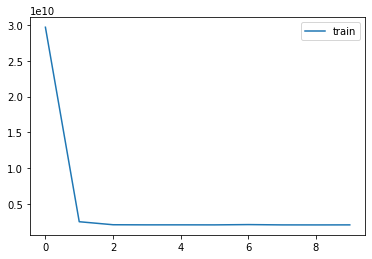

In [91]:
plt.plot(history.history['mean_squared_error'],label='train')
plt.legend(loc='best')

# 問題6 MNISTでKerasを学習

In [107]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max())
print(X_train.min())
print(X_train.shape)
print(y_train.shape)

X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
print(X_train.shape)
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64
print(type(y_train_one_hot))


X_train, X_val, y_train_one_hot,y_val_one_hot = \
train_test_split(X_train, y_train_one_hot,
                                                 test_size=0.2)

y_train_one_hot = y_train_one_hot[:, np.newaxis, np.newaxis, :]
y_test_one_hot = y_test_one_hot[:, np.newaxis, np.newaxis, :]
y_val_one_hot = y_val_one_hot[:, np.newaxis, np.newaxis, :]

1.0
0.0
(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)
(60000, 10)
float32
<class 'numpy.ndarray'>


In [104]:
K.clear_session()

input_data = tf.keras.layers.Input(shape=(28,28,1))

x = tf.keras.layers.Conv2D(6, (5,5),padding='SAME',
                           activation=tf.nn.relu)(input_data)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(16, (5,5), padding='VALID',
                          activation=tf.nn.relu)(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(120, (5,5), padding='VALID', 
                          activation=tf.nn.relu)(x)

x = tf.keras.layers.Dense(84, activation=tf.nn.relu)(x)
output = tf.keras.layers.Dense(10, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=input_data, outputs=output)





In [105]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
dense (Dense)                (None, 1, 1, 84)          10164 

In [108]:
model.compile(loss='categorical_crossentropy',
             optimizer = tf.train.AdamOptimizer(learning_rate=0.01),
             metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, verbose=1,
                    validation_data =(X_val,y_val_one_hot),
                   batch_size=1000, epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 12s 256us/sample - loss: 0.4954 - acc: 0.8335 - val_loss: 0.1010 - val_acc: 0.9688
Epoch 2/20
48000/48000 [==============================] - 12s 253us/sample - loss: 0.0836 - acc: 0.9746 - val_loss: 0.0734 - val_acc: 0.9781
Epoch 3/20
48000/48000 [==============================] - 12s 258us/sample - loss: 0.0546 - acc: 0.9832 - val_loss: 0.0536 - val_acc: 0.9818
Epoch 4/20
48000/48000 [==============================] - 13s 273us/sample - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0587 - val_acc: 0.9811
Epoch 5/20
48000/48000 [==============================] - 14s 283us/sample - loss: 0.0316 - acc: 0.9896 - val_loss: 0.0426 - val_acc: 0.9872
Epoch 6/20
48000/48000 [==============================] - 14s 292us/sample - loss: 0.0270 - acc: 0.9912 - val_loss: 0.0482 - val_acc: 0.9862
Epoch 7/20
48000/48000 [==============================] - 14s 294us/sample - loss: 0.0229 - acc: 0.9927 

In [109]:
score = model.evaluate(X_train, y_train_one_hot, verbose=0)
print('train loss: ', score[0])
print('train acc: ', score[1])
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('test loss: ', score[0])
print('test acc: ', score[1])

train loss:  0.006391601896663578
train acc:  0.9978125
test loss:  0.057867146629622286
test acc:  0.9881


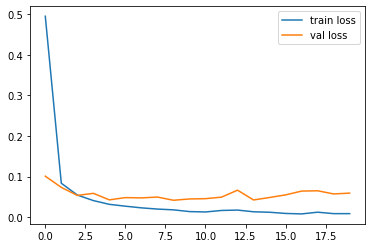

In [111]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend(loc='best')

# 基本課題範囲ここまで

# 問題7 PyTorchへの書き換え

In [3]:
import torch
import torchvision
from torchvision import transforms

In [4]:
train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('../data', train=True,
              download=True, transform =\
                           transforms.Compose([
                  transforms.ToTensor(),
                  transforms.Normalize((0.1307,), (0.3081,))
              ])),
    batch_size = args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
datasets.MNIST('../data', train=False, transform=\
               transforms.Compose([
                  transforms.ToTensor(),
                  transforms.Normalize((0.1307,), (0.3081,))
              ])),
    batch_size = args.batch_size, shuffle=True, **kwargs)



100.1%

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


113.5%

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


100.4%

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


180.4%

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


NameError: name 'args' is not defined

In [5]:
x = torch.Tensor(2,2)
print(x)

tensor([[1.1632e+33, 5.6003e-02],
        [7.0374e+22, 2.7556e-40]])


In [6]:
list = [[1, 2, 3], [4, 5, 6]]
list

[[1, 2, 3], [4, 5, 6]]

In [7]:
x2 = torch.Tensor(list)
x2

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [8]:
x2.size()

torch.Size([2, 3])

In [9]:
x2.shape

torch.Size([2, 3])

In [10]:
torch.rand(2, 2)

tensor([[0.6897, 0.7909],
        [0.7640, 0.5116]])

In [11]:
torch.randn(2, 2)

tensor([[-0.3344, -0.0547],
        [ 0.7391, -0.8190]])

In [12]:
torch.eye(3,3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [13]:
torch.empty(4,1)

tensor([[4.2039e-45],
        [0.0000e+00],
        [9.5584e-31],
        [1.4013e-45]])

In [14]:
torch.linspace(0,100,11)

tensor([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [15]:
x = torch.Tensor([[2,2], [1,1]])
y = torch.Tensor([[3, 2], [1,2]])
print(x)
print(y)

tensor([[2., 2.],
        [1., 1.]])
tensor([[3., 2.],
        [1., 2.]])


In [16]:
print(x + y)

tensor([[5., 4.],
        [2., 3.]])


In [17]:
print(torch.add(x, y))

tensor([[5., 4.],
        [2., 3.]])


In [18]:
print(x * y)
print(torch.mul(x, y))

tensor([[6., 4.],
        [1., 2.]])
tensor([[6., 4.],
        [1., 2.]])


In [19]:
#行列積
print(torch.mm(x, y))

tensor([[8., 8.],
        [4., 4.]])


In [20]:
print(torch.sum(x))

tensor(6.)


In [21]:
torch.std(x)

tensor(0.5774)

In [22]:
torch.mean(x)

tensor(1.5000)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.array(df_house.loc[:,['GrLivArea', 'YearBuilt']])
y = np.array(df_house.loc[:, 'SalePrice']).reshape(-1,1)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=0,
                                                  test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,
                                                 random_state=0, test_size=0.2)
sr = StandardScaler()
X_train_std = sr.fit_transform(X_train)
X_test_std = sr.transform(X_test)
X_val_std = sr.transform(X_val)


In [32]:
#線形回帰
model = torch.nn.Linear(2,1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.6)

In [46]:
def Trainer(X,y, model, epochs=2000):
    for epoch in range(epochs):
        inputs = torch.from_numpy(X.astype(np.float32))
        #inputs = torch.float(inputs)
        
        targets = torch.from_numpy(y.astype(np.float32))
        #targets = torch.float(targets)
        
        #誤差の算出
        outputs = model(inputs)
        cost = loss(outputs, targets)
        
        #Backprop
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 1000,
                                                       cost.item()))
        

In [47]:
Trainer(X_train_std, y_train, model = model)

Epoch [100/1000], Loss: 2104096256.0000
Epoch [200/1000], Loss: 2104096256.0000
Epoch [300/1000], Loss: 2104096256.0000
Epoch [400/1000], Loss: 2104096256.0000
Epoch [500/1000], Loss: 2104096256.0000
Epoch [600/1000], Loss: 2104096256.0000
Epoch [700/1000], Loss: 2104096256.0000
Epoch [800/1000], Loss: 2104096256.0000
Epoch [900/1000], Loss: 2104096256.0000
Epoch [1000/1000], Loss: 2104096256.0000
Epoch [1100/1000], Loss: 2104096256.0000
Epoch [1200/1000], Loss: 2104096256.0000
Epoch [1300/1000], Loss: 2104096256.0000
Epoch [1400/1000], Loss: 2104096256.0000
Epoch [1500/1000], Loss: 2104096256.0000
Epoch [1600/1000], Loss: 2104096256.0000
Epoch [1700/1000], Loss: 2104096256.0000
Epoch [1800/1000], Loss: 2104096256.0000
Epoch [1900/1000], Loss: 2104096256.0000
Epoch [2000/1000], Loss: 2104096256.0000


[[1108 1930]
 [1964 1911]
 [1506 2008]
 ...
 [1601 1958]
 [2098 2005]
 [1368 2005]]
